In [1]:
# libraries
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import scipy
from scipy.optimize import curve_fit
from scipy.optimize import fmin
%matplotlib inline
import matplotlib as mpl

# Mass spectrum

In [28]:
mz=list(range(0,9990))
intensity=[0]*9990
intensity[1371]=0.0086
intensity[1372]=0.0036
intensity[1373]=0.0008
intensity[1374]=0.0297
intensity[1375]=0.0115
intensity[1376]=0.0405
intensity[1377]=0.0207
intensity[1378]=0.0086
intensity[1379]=0.0075
intensity[1380]=0.0039
intensity[1381]=0.0016

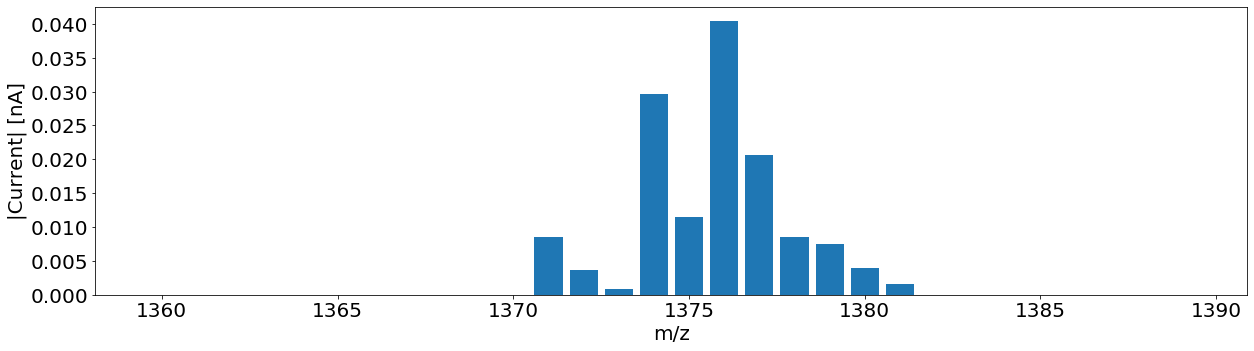

In [29]:
fig=plt.figure(figsize=(16,4))
ax=fig.add_axes([0,0,1,1])
ax.bar(mz[1360:1390],intensity[1360:1390])
ax.set_ylabel('|Current| [nA]',fontsize=20)
ax.set_xlabel('m/z',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

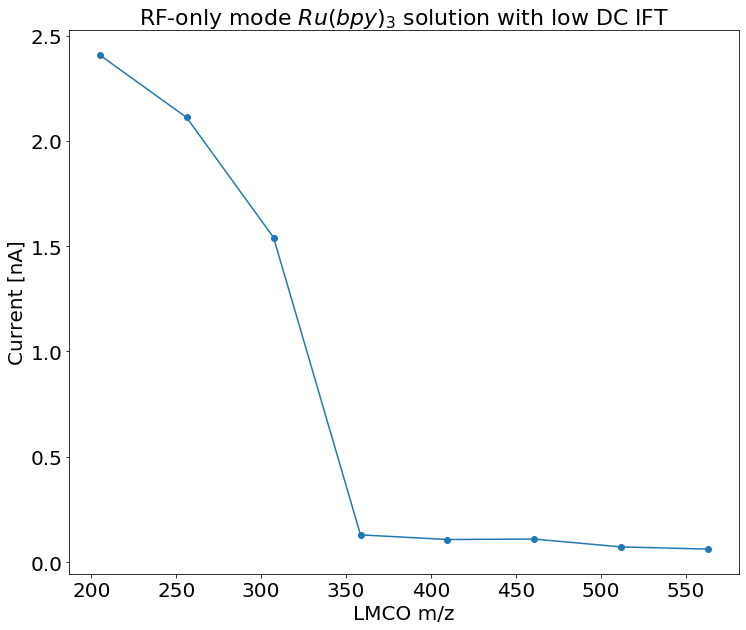

In [3]:
## For low mass cut off.
x=[204.9]
for i in range (16):
    x.append(x[i]+51.2)

y=[2.408,2.111,1.541,0.129,0.107,0.109,0.0718,0.0615]

fig=plt.figure(figsize=(12,10))
plt.plot(x[0:8],y,'-o')
plt.ylabel('Current [nA]',fontsize=20)
plt.xlabel('LMCO m/z',fontsize=20)
plt.title('RF-only mode $Ru(bpy)_3$ solution with low DC IFT',fontsize='22')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

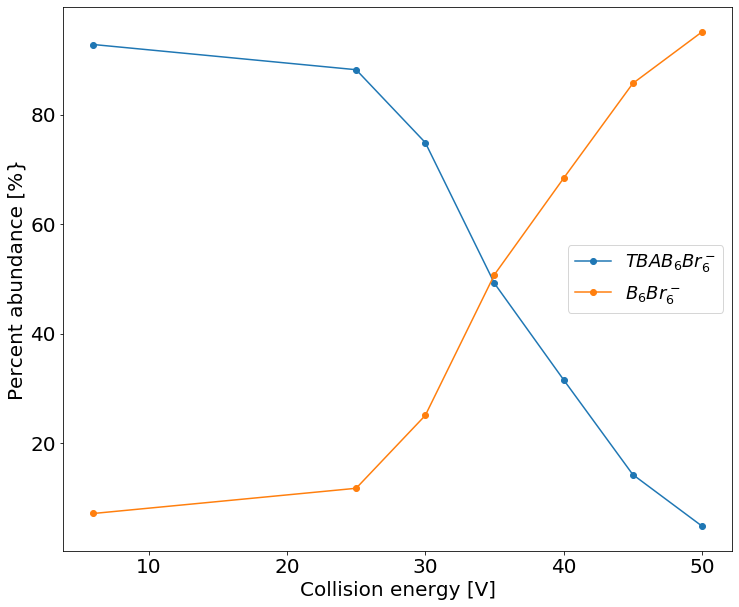

In [64]:
x1=[2,5,,10,15,20,25,30,35,40,45,50,55,65,80,100,110,120,130,140,150,160,210]
y1=[92.8,88.2,74.9,49.2,31.6,14.3,4.9]
y2=[7.2,11.8,25.1,50.8,68.4,85.7,95.1]

fig=plt.figure(figsize=(12,10))
plt.plot(x1,y1,'-o',label='$TBAB_6Br_6^-$')
plt.plot(x1,y2,'-o',label='$B_6Br_6^-$')
#axhline(y=-1.45,linestyle='--',color='k',label='Continuous mode')
plt.ylabel('Percent abundance [%}',fontsize=20)
plt.xlabel('Collision energy [V]',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(loc='best',fontsize=18)
plt.show()

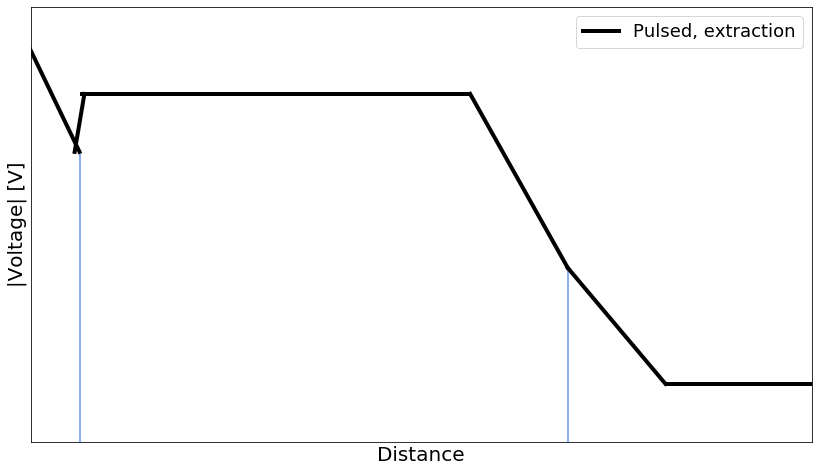

In [2]:
#Voltages
Inlet=420
Repi=466.5
Repo=318
HPFi=310
HPFo=151
LPFi=150
LPFL=15
LPFo=10
Injb=12
Injl=6
BF=2
TKL1=-20
Quad=5
Exit=-12.1
Surf=0

Injb_trap=-29
Injl_trap=25

#Positions
pCh1=-11
pCh1e=-5
pCh2=-1
pCh3=0
pCh4=1.8

fig=plt.figure(figsize=(14,8))

plt.vlines(pCh1,-30,Repi,color='cornflowerblue')
plt.vlines(pCh1e,-30,HPFo,color='cornflowerblue')
plt.vlines(pCh2,-30,LPFo,color='cornflowerblue')
plt.vlines(pCh3,-30,Injl,color='cornflowerblue')
plt.vlines(pCh4,-30,BF,color='cornflowerblue')

x0=np.linspace(-11,-10,100) #Repeler
y0=(Repo-Repi)/(-10+11)*(x0+11)+Repi
plt.plot(x0,y0,'k', linewidth=4)

plt.plot(-10.5,Inlet,'ro') #Inlet

x0=np.linspace(-10.01,-9.99,100) #Voltage filler
y0=(Repo-HPFi)/(-0.02)*(x0+9.99)+HPFi
plt.plot(x0,y0,'k', linewidth=4)


x0=np.linspace(-10,-5,100) #HPF
y0=(HPFo-HPFi)/(-5+10)*(x0+10)+HPFi
plt.plot(x0,y0,'k', linewidth=4)

x0=np.linspace(-5,-1,100) #LPF
y0=(LPFo-LPFi)/(-1+5)*(x0+5)+LPFi
plt.plot(x0,y0,'k', linewidth=4)

#plt.plot(-1.1,LPFL,'ko') #Inlet


x0=np.linspace(-1.01,-0.99,100) #Voltage filler
y0=(LPFo-Injb)/(-0.02)*(x0+0.99)+Injb
plt.plot(x0,y0,'k', linewidth=4,label='Pulsed, extraction')

x0=np.linspace(-1.01,-0.99,100) #Voltage filler trap
y0=(LPFo-Injb_trap)/(-0.02)*(x0+0.99)+Injb_trap
#plt.plot(x0,y0,'--g', linewidth=4,label='Trap and excitation')

plt.hlines(Injb,-1,-0.2, linewidth=4) #Inj bias
#plt.hlines(Injb_trap,-1,-0.2, linewidth=4,color='g',linestyle='--') #Inj bias


x=np.linspace(-0.2,0,10) #Inj lens1trap
y=(Injl_trap-Injb_trap)/0.2*x+Injl_trap
#plt.plot(x,y,'--g', linewidth=4)
x1=np.linspace(0,0.2,10) #Inj lens2
y1=(Injl_trap-BF)/(-0.2)*x1+Injl_trap
#plt.plot(x1,y1,'--g', linewidth=4)

x=np.linspace(-0.2,0,10) #Inj lens1
y=(Injl-Injb)/0.2*x+Injl
plt.plot(x,y,'k', linewidth=4)
x1=np.linspace(0,0.2,10) #Inj lens2
y1=(Injl-BF)/(-0.2)*x1+Injl
plt.plot(x1,y1,'k', linewidth=4)
plt.hlines(BF,0.2,1.8, linewidth=4) #BF bias

x2=np.linspace(1.8,2,10) #TKL1
y2=(TKL1-BF)/(2-1.8)*(x2-2)+TKL1
plt.plot(x2,y2,'k', linewidth=4)
x3=np.linspace(2,2.2,10) #TKL1.2
y3=(TKL1-Quad)/(2-2.2)*(x3-2)+TKL1
plt.plot(x3,y3,'k', linewidth=4)

plt.hlines(Quad,2.2,9.8, linewidth=4)

x4=np.linspace(9.8,10,10) #Exit
y4=(Exit-Quad)/(10-9.8)*(x4-10)+Exit
plt.plot(x4,y4,'k', linewidth=4)
x5=np.linspace(10,10.2) #Exit.2
y5=(Exit-Surf)/(10-10.2)*(x5-10)+Exit
plt.plot(x5,y5,'k', linewidth=4)

plt.hlines(Surf,10.2,11, linewidth=4) #Surface


plt.ylabel('|Voltage| [V]',fontsize=20)
plt.xlabel('Distance',fontsize=20)
plt.ylim(-0,15)
#plt.ylim(-30,480)
plt.xlim(-1.1,0.5)
#plt.xlim(-11.5,11.5)
#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.legend(loc='best',fontsize=18)

for ax in fig.get_axes():
    ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
    
plt.show()

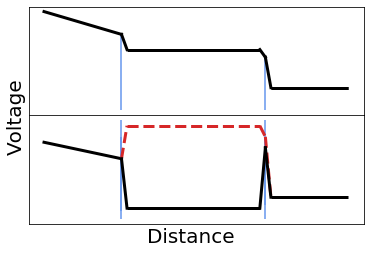

In [6]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(constrained_layout=False, figsize=(6, 4))
spec = GridSpec(ncols=1, nrows=2, hspace=0, figure=fig)
ax1 = fig.add_subplot(spec[0, :])
ax2 = fig.add_subplot(spec[1, :])

#for ax in axs:
#    ax.label_outer()

x0=np.linspace(-1.3,-1.02,100) #LPF
y0=(9-12)/(-1.02+1.3)*(x0+1.3)+12
ax1.plot(x0,y0,'k', linewidth=3)
ax2.plot(x0,y0,'k', linewidth=3)

x1IFT=-1
x2IFT=-0.52
xIFTl=-0.5
xBF=-.48
x1BF=-0.2
x0=np.linspace(-1.02,x1IFT,100) #Voltage filler
y0=(9-7)/(-0.02)*(x0-x1IFT)+7
ax1.plot(x0,y0,'k', linewidth=3)
ax1.hlines(7,x1IFT,x2IFT, linewidth=3) #Inj bias
x=np.linspace(x2IFT,xIFTl,10) #Inj lens1
y=(Injl-7)/(+0.02)*(x-xIFTl)+Injl
ax1.plot(x,y,'k', linewidth=3)
x1=np.linspace(xIFTl,xBF,10) #Inj lens2
y1=(Injl-BF)/(-0.02)*(x1-xIFTl)+Injl
ax1.plot(x1,y1,'k', linewidth=3)
ax1.hlines(BF,xBF,x1BF, linewidth=3, label='Continuous') #BF bias
ax1.vlines(-1.02,-1,9,color='cornflowerblue')
ax1.vlines(xIFTl,-1,6,color='cornflowerblue')

LPFo=9
IFTb=15
IFTl=13
x0=np.linspace(-1.02,x1IFT,100) #Voltage filler trap
y0=(LPFo-IFTb)/(-0.02)*(x0-x1IFT)+IFTb
ax2.plot(x0,y0,'--', color='tab:red',linewidth=3)
ax2.hlines(IFTb,x1IFT,x2IFT, color='tab:red', linestyle='--',linewidth=3) #Inj bias
x=np.linspace(x2IFT,xIFTl,10) #Inj lens1trap
y=(IFTl-IFTb)/0.02*(x-xIFTl)+IFTl
ax2.plot(x,y,'--',color='tab:red', linewidth=3,label='Pulsed,\nextraction')
x1=np.linspace(xIFTl,xBF,10) #Inj lens2
y1=(IFTl-BF)/(-0.02)*(x1-xIFTl)+IFTl
ax2.plot(x1,y1,'--',color='tab:red', linewidth=3)
ax1.hlines(BF,xBF,x1BF, linewidth=3, label='Continuous') #BF bias
ax2.vlines(-1.02,-.5,13,color='cornflowerblue')
ax2.vlines(xIFTl,0.5,13,color='cornflowerblue')

x0=np.linspace(-1.02,x1IFT,100) #Voltage filler trap
y0=(9-0)/(-0.02)*(x0-x1IFT)+0
ax2.plot(x0,y0,'k', linewidth=3)
ax2.hlines(0,x1IFT,x2IFT, linewidth=3,color='k', label='Pulsed,trap') #Inj bias
x=np.linspace(x2IFT,xIFTl,10) #Inj lens1trap
y=(11-0)/0.02*(x-xIFTl)+11
ax2.plot(x,y,'k', linewidth=3)
x1=np.linspace(xIFTl,xBF,10) #Inj lens2
y1=(11-BF)/(-0.02)*(x1-xIFTl)+11
ax2.plot(x1,y1,'k', linewidth=3)
ax2.hlines(BF,xBF,x1BF, linewidth=3, label='Continuous') #BF bias
ax2.vlines(-1.02,-2,16,color='cornflowerblue')
ax2.vlines(xIFTl,-2,16,color='cornflowerblue')



for ax in fig.get_axes():
    ax.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)

fig.text(0.075, 0.5, "Voltage", rotation="vertical", va="center",fontsize=20)
fig.text(0.5, 0.06, "Distance", rotation="horizontal", ha="center",fontsize=20)
#fig.text(0.04, 0.5, '|Voltage| [V]', va='center', rotation='vertical',fontsize=20)
#fig.text(0.5, 0.04, 'Distance', ha='center',fontsize=20)
#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)



plt.savefig('Profile2.png', format='png', dpi=600, bbox_inches='tight')
plt.show()

In [2]:
excel_file='Ru(bpy)2+diamine.xlsx'
S1 = pd.read_excel(excel_file,'Sheet1')

(array([0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ]),
 <a list of 10 Text yticklabel objects>)

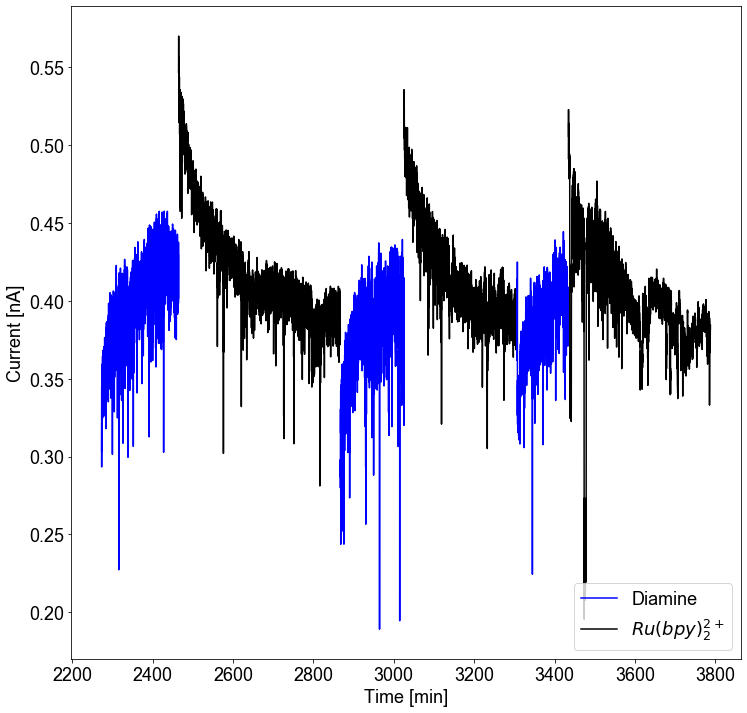

In [17]:
W=[]
W1=S1[1].dropna()
W2=S1[2].dropna()
W3=S1[3].dropna()
W4=S1[4].dropna()
W5=S1[5].dropna()
W6=S1[6].dropna()
W7=S1[7].dropna()
W8=S1[8].dropna()
W9=S1[9].dropna()
W10=S1[10].dropna()
W11=S1[11].dropna()
W12=S1[12].dropna()
W17=S1[17].dropna()
W18=S1[18].dropna()
W19=S1[19].dropna()
W20=S1[20].dropna()

x=np.linspace(0,1000,len(W))
plt.rc('font', family='arial')
fig=plt.figure(figsize=(12,12))
#plt.plot(np.linspace(0,len(W1)*0.3,len(W1)),W1,'k')
t=len(W1)+len(W2)*0.3
#plt.plot(np.linspace(len(W1)*0.3,t,len(W2)),W2,'b')
t1=t+len(W3)*0.3
#plt.plot(np.linspace(t,t1,len(W3)),W3,'k')
t2=t1+len(W4)*0.3
#plt.plot(np.linspace(t1,t2,len(W4)),W4,'b')
t3=t2+len(W5)*0.3
#plt.plot(np.linspace(t2,t3,len(W5)),W5,'k')
t4=t3+len(W6)*0.3
#plt.plot(np.linspace(t3,t4,len(W6)),W6,'b')
t5=t4+len(W7)*0.3
#plt.plot(np.linspace(t4,t5,len(W7)),W7,'k')
t6=t5+len(W8)*0.3
#plt.plot(np.linspace(t5,t6,len(W8)),W8,'b')
t7=t6+len(W9)*0.3
#plt.plot(np.linspace(t6,t7,len(W9)),W9,'k')
t8=t7+len(W10)*0.3
plt.plot(np.linspace(t7,t8,len(W10))/18,W10,'b')
t9=t8+len(W11)*0.3
plt.plot(np.linspace(t8,t9,len(W11))/18,W11,'k')
t10=t9+len(W12)*0.3
plt.plot(np.linspace(t9,t10,len(W12))/18,W12,'b')
t11=t10+len(W17)*0.3
plt.plot(np.linspace(t10,t11,len(W17))/18,W17,'k')
t12=t11+len(W18)*0.3
plt.plot(np.linspace(t11,t12,len(W18))/18,W18,'b', label='Diamine')
t13=t12+len(W19)*0.3
plt.plot(np.linspace(t12,t13,len(W19))/18,W19,'k',label='$Ru(bpy)_2^{2+}$')
plt.legend(loc='lower right', fontsize=18)
plt.xlabel('Time [min]',fontsize=18)
plt.ylabel('Current [nA]',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

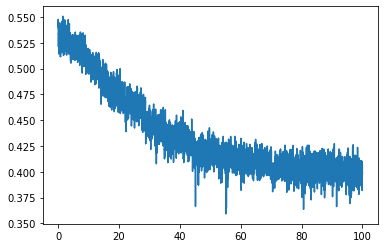

In [15]:
x=np.linspace(0,100,15553)
plt.plot(x,W)

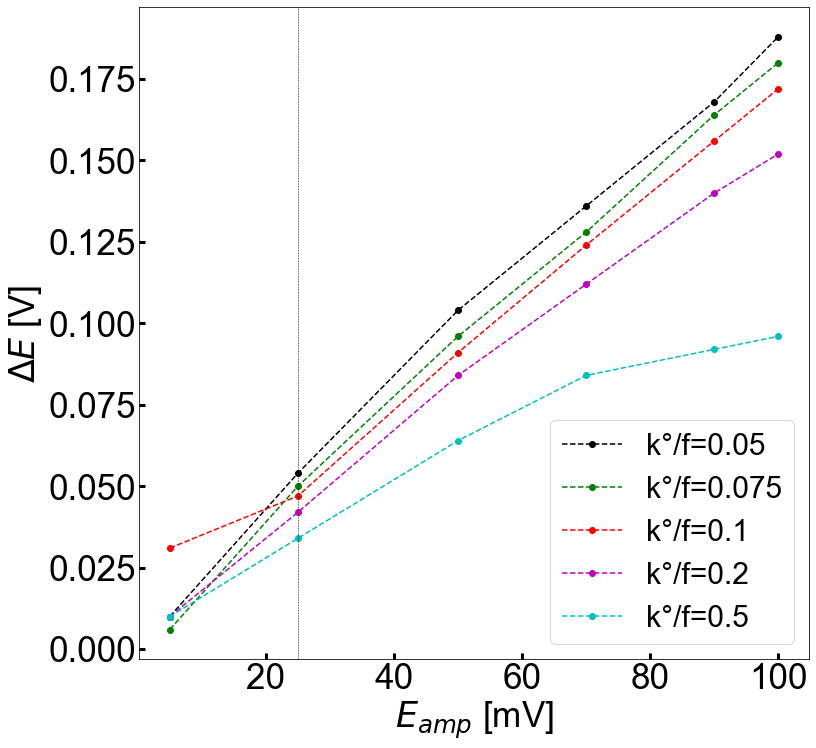

In [3]:
x=[5,25,50,70,90,100]
x3=[5,25,50,70,90,100]
x2=[-1.12,-1,-.70,-.30]
y1=[.01,.054,.104,.136,.168,.188]
y2=[.006,.05,.096,.128,.164,.18]
y3=[0.031,.047,.091,.124,.156,.172]
y4=[.01,.042,.084,.112,.14,.152]
y5=[.01,.033,.064,.084,.092,.096]
y6=[0.05,0.047,0.042,0.033]
y7=-.0202*np.array(x2)+.0272
y8=[0.01,0.034,0.064,0.084,0.092,0.096]

plt.rc('font', family='arial')
fig=plt.figure(figsize=(12,12))
plt.plot(x3,y1,'o',linestyle='--',color='k',label='k°/f=0.05')
plt.plot(x3,y2,'o',linestyle='--',color='g',label='k°/f=0.075')
plt.plot(x3,y3,'o',linestyle='--',color='r',label='k°/f=0.1')
plt.plot(x3,y4,'o',linestyle='--',color='m',label='k°/f=0.2')
plt.plot(x3,y8,'o',linestyle='--',color='c',label='k°/f=0.5')
axvline(x=25,color='k', linestyle='--',linewidth='0.5')
plt.legend(loc='lower right', fontsize=30)
plt.xlabel('$E_{amp}$ [mV]',fontsize=35)
plt.ylabel('$\Delta E$ [V]',fontsize=35)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.tick_params(direction='in', length=6, width=3,grid_alpha=0.5)
#left, bottom, width, height = [0.22, 0.6, 0.25, 0.25]
#ax2 = fig.add_axes([left, bottom, width, height])
#ax2.plot(x2,y6,'.',color='b')
#ax2.plot(x2,y7,linestyle='--',color='b',label='$R^2$=0.9957')
#ax2.legend(loc='upper right', fontsize=14)
#text(0.23, 0.43, 'log(w)', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes, fontsize=11)
#text(0.02, 0.63, '$\Delta E$ [V]', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes, fontsize=11)

plt.savefig('Calibration.svg', format='svg', dpi=1200,bbox_inches='tight')

In [3]:
excel_file='Hugo.xlsx'
S1 = pd.read_excel(excel_file,'Sheet5')
#S2 = pd.read_excel(excel_file,'Au water')
#S3 = pd.read_excel(excel_file,'FcSAM')
#S4 = pd.read_excel(excel_file,'NH3SAM')
#S5 = pd.read_excel(excel_file,'Au bck1.5')
#S6 = pd.read_excel(excel_file,'Au water 1.5')
#S7 = pd.read_excel(excel_file,'FcSAM 1.5')
#S8 = pd.read_excel(excel_file,'NH3SAM1.5')

In [34]:
type(S1)

pandas.core.frame.DataFrame

In [33]:
x=pd.DataFrame(S1,columns=['A'])
y=pd.DataFrame(S1,columns=['C'])

df = pd.DataFrame({'speed': S1,columns=['A'],'lifespan': S1,columns=['C']]}, index=index)
ax = df.plot.bar(rot=0)
#plt.figure(figsize=(12, 16))
#plt.rc('font', size=16)
#plt.plot(x,-y, '-*',color='k',label='Setting 1')

#plt.plot(x,y, color='k')
#plt.plot(x2,y2, color='b',label='$NH_3SAM^+$ 1.5 mm')
#axvline(x=665,color='g', linestyle='--',linewidth='0.5')
#axvline(x=1034,color='g', linestyle='--',linewidth='0.5')
#axvline(x=1247,color='g', linestyle='--',linewidth='0.5')
#axvline(x=1337,color='k', linestyle='--',linewidth='0.5')
#axvline(x=1371,color='g', linestyle='--',linewidth='0.5')
#axvline(x=2400,color='k', linestyle='--',linewidth='0.5')
#axvline(x=2855,color='g', linestyle='--',linewidth='0.5')
#axvline(x=2882,color='g', linestyle='--',linewidth='0.5')
#axvline(x=2928,color='g', linestyle='--',linewidth='0.5')
#plt.gca().invert_xaxis()
#plt.xlabel('Wavenumbers $[cm^{-1}]$',fontsize=18)
#plt.ylabel('Absorbance ',fontsize=18)
#plt.legend(loc='upper left', fontsize=16)
#plt.xlim(4000,550)
#plt.ylim(-0.015,0.02)
#plt.title('MoPOM (6 mm mask size) IRRAS',fontsize=14)

SyntaxError: invalid syntax (<ipython-input-33-c7563532f724>, line 4)

In [13]:
x=pd.DataFrame(S1,columns=['x'])
y=pd.DataFrame(S1,columns=['y'])

#y2=y2.rolling(window=10).mean()
fig, ax1 = plt.subplots()
plt.plot(x,y, color='k')
ax1.set_xlabel('Wavelength [nm]',fontsize=14)
ax1.set_ylabel('Absorbance', color='k',fontsize=14)
ax2=ax1.twinx()
ax2.set_ylim(-.001, .02)
ax2.plot(x2,y2-.0145, color='b')
plt.xlabel('Wavelength [nm]',fontsize=14)
plt.ylabel('Fluorescence',fontsize=14,color='b')
#plt.legend(loc='lower left', fontsize=12)
#plt.title('MoPOM (6 mm mask size) IRRAS',fontsize=14)

NameError: name 'PLT' is not defined

<Figure size 864x1152 with 0 Axes>

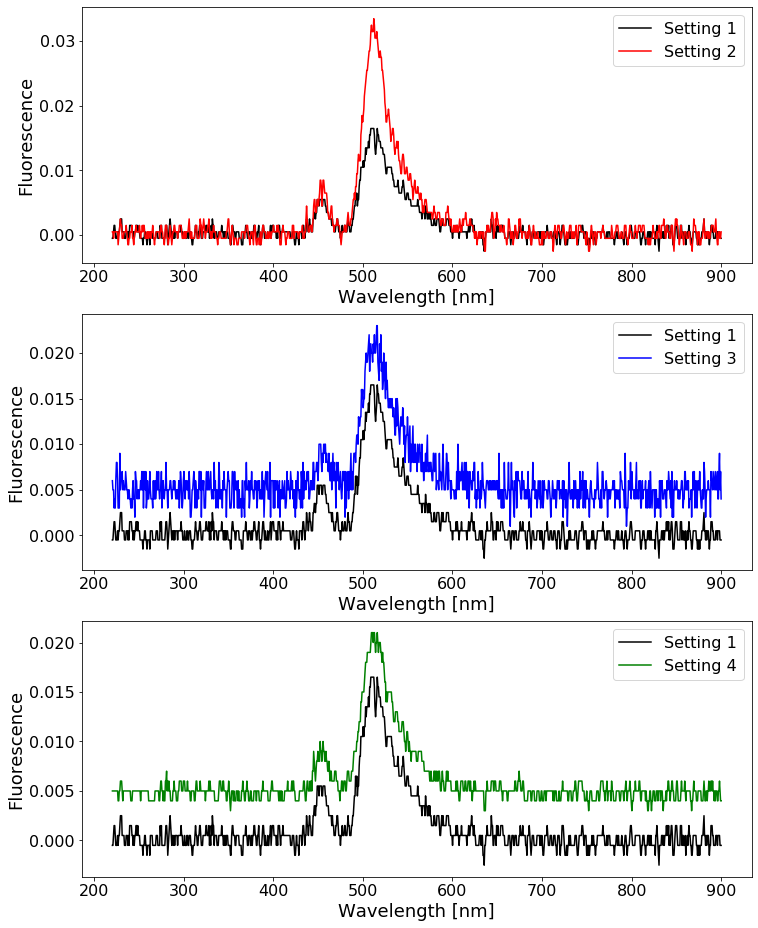

In [25]:
x2=pd.DataFrame(sample2,columns=['Setting 2:Wavelength(nm)'])
y2=pd.DataFrame(sample2,columns=['Setting 2:Fluorescence'])
x3=pd.DataFrame(sample2,columns=['Setting 3:Wavelength(nm)'])
y3=pd.DataFrame(sample2,columns=['Setting 3:Fluorescence'])
x4=pd.DataFrame(sample2,columns=['Setting 4:Wavelength(nm)'])
y4=pd.DataFrame(sample2,columns=['Setting 4:Fluorescence'])
#y=y.rolling(window=10).mean()
x1=pd.DataFrame(sample2,columns=['450:Wavelength(nm)'])
y1=pd.DataFrame(sample2,columns=['450:Fluorescence'])
#y1=y1.rolling(window=10).mean()

plt.figure(figsize=(12, 16))
plt.rc('font', size=16)
plt.subplot(311)
plt.plot(x1,y1-.0145, color='k',label='Setting 1')
plt.plot(x2,y2-.0145, color='r', label='Setting 2')
plt.xlabel('Wavelength [nm]',fontsize=18)
plt.ylabel('Fluorescence',fontsize=18)
plt.legend(loc='upper right', fontsize=16)
plt.subplot(312)
plt.plot(x1,y1-.0145, color='k',label='Setting 1')
plt.plot(x3,y3-.01, color='b', label='Setting 3')
plt.xlabel('Wavelength [nm]',fontsize=18)
plt.ylabel('Fluorescence',fontsize=18)
plt.legend(loc='upper right', fontsize=16)
plt.subplot(313)
plt.plot(x1,y1-.0145, color='k',label='Setting 1')
plt.plot(x4,y4-.01, color='g', label='Setting 4')
plt.xlabel('Wavelength [nm]',fontsize=18)
plt.ylabel('Fluorescence',fontsize=18)
plt.legend(loc='upper right', fontsize=16)
#plt.title('MoPOM (6 mm mask size) IRRAS',fontsize=14)

Text(0.5, 1.0, 'Ratio of the distances as a function of the kinetic stress')

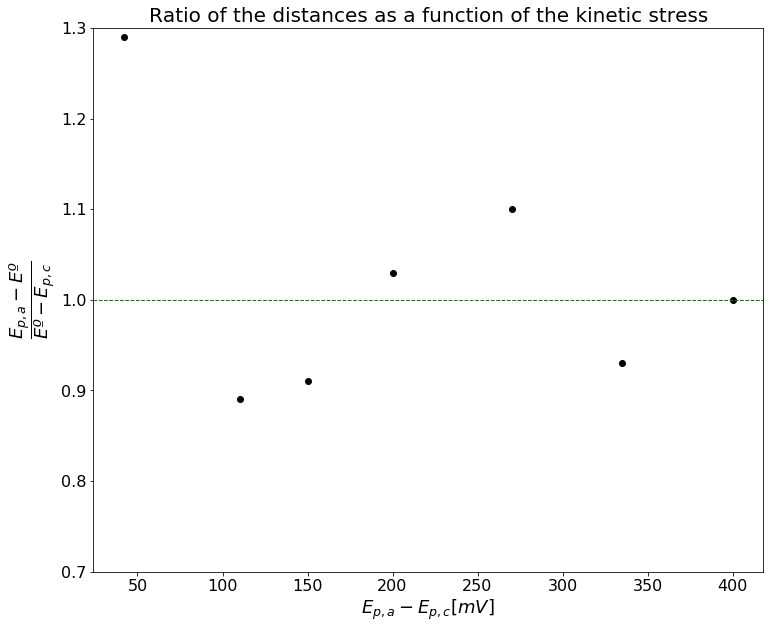

In [35]:
x=[200,42,110,150,200,270,335,400]
x=np.array(x)
y1=[1.29,.89,.91,1.03,1.1,.93,1.0]
y1_t=.13*x+.22
y2=[.14,.16,.2]
y2_t=.11*x+.21
plt.figure(figsize=(12, 10))
plt.rc('font', size=16)
plt.plot(x,y1,'o',color='k',label='Anodic')
axhline(y=1,color='g', linestyle='--',linewidth='1')
#plt.plot(x,y1_t,'-',color='k', label='Anodic, slope = 0.90')
#plt.plot(x,y2,'o',color='b',label='Cathodic')
#plt.plot(x,y2_t,'-',color='b',label='Cathodic, slope= 0.70')
plt.xlabel('$E_{p,a}-E_{p,c} [mV]$',fontsize=18)
plt.ylabel('$\dfrac{E_{p,a}-Eº}{Eº-E_{p,c}}$',fontsize=18)
plt.ylim(0.7,1.3)
#plt.legend(loc='upper left', fontsize=18)
plt.title('Ratio of the distances as a function of the kinetic stress',fontsize=20)

### Linear plot and confidence intervals

numpy.ndarray

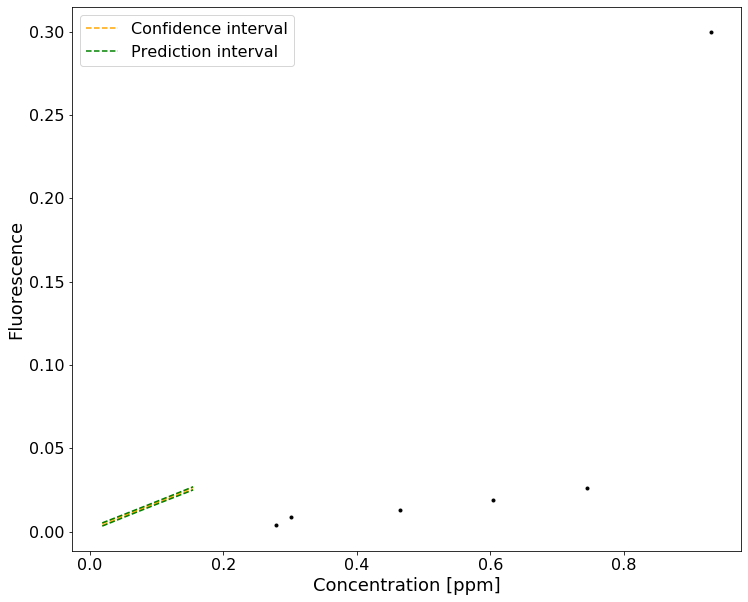

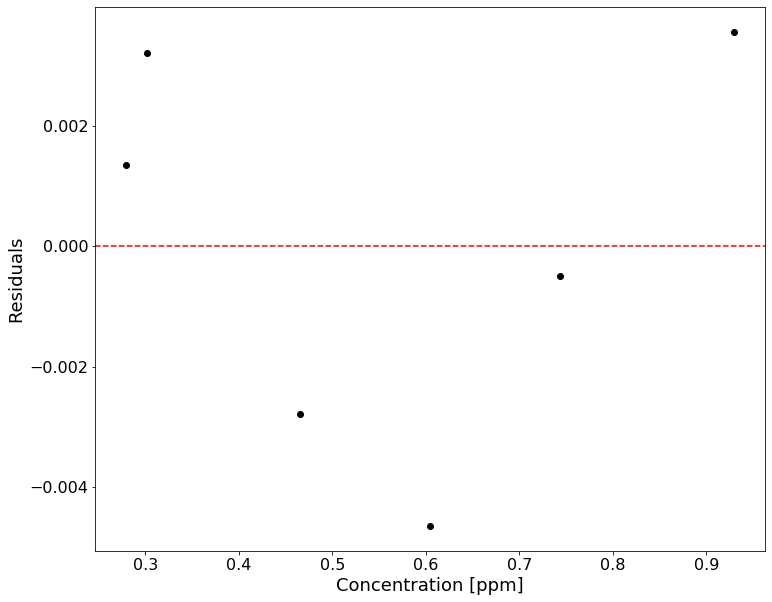

In [91]:
x=[204.9,307.3 409.7,512.1,614.5,716.9,819.3,921.7,1024.1,1126.5,1228.9,1331.6,1434,1536.4,1638.8,1741.2,1843.6]
x=np.array(x)
y=[0.004,.009,.013,.019,.026,.3]
res=[0.001356,.003213,-.002786,-.004643,-.000499,.003559]
m=0.1595
b=0.001238
t=3.182
n=5
Ve=(5.7866*10**-8)
Sxx=0.0115855
x_1=np.linspace(0.019,0.155,16)
y_CI1=m*x_1+b+t*(Ve*(1/n+(x_1-mean(x_1))**2/Sxx))**(1/2)
y_CI2=m*x_1+b-t*(Ve*(1/n+(x_1-mean(x_1))**2/Sxx))**(1/2)
y_PI1=m*x_1+b+t*(Ve*(1+1/n+(x_1-mean(x_1))**2/Sxx))**(1/2)
y_PI2=m*x_1+b-t*(Ve*(1+1/n+(x_1-mean(x_1))**2/Sxx))**(1/2)
yc=x*m+b

plt.figure(figsize=(12, 10))
plt.rc('font', size=16)
plt.plot(x,y,'.',color='k')
plt.plot(x_1,y_CI1,'--',color='orange',label='Confidence interval')
plt.plot(x_1,y_CI2,'--',color='orange')
plt.plot(x_1,y_PI1,'--',color='g', label='Prediction interval')
plt.plot(x_1,y_PI2,'--',color='g')
plt.xlabel('Concentration [ppm]',fontsize=18)
plt.ylabel('Fluorescence',fontsize=18)
plt.legend(loc='upper left', fontsize=16)

plt.figure(figsize=(12, 10))
plt.rc('font', size=16)
plt.plot(x,res,'o',color='k')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Concentration [ppm]',fontsize=18)
plt.ylabel('Residuals',fontsize=18)
type(x)

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7]),
 <a list of 9 Text yticklabel objects>)

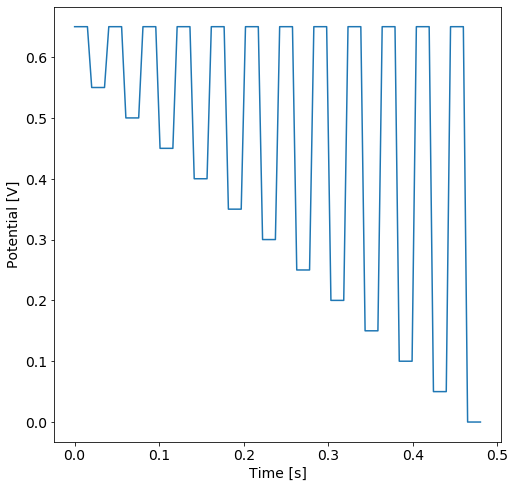

In [103]:
import numpy as np
u=np.linspace(0, .48, num=96)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.plot(u,y)
plt.xlabel('Time [s]',fontsize=14)
plt.ylabel('Potential [V]',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)